In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')


In [3]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


# Cargo input

In [14]:
# Cargamos datos TRAIN
dftrain = pd.read_csv("data origin/train_cleaned_agrupando_2021.csv", delimiter=';') # cargamos fichero

In [15]:
# Cargamos datos TEST
dftest = pd.read_csv("data origin/test_cleaned_agrupando_2021.csv", delimiter=';') # cargamos fichero

In [16]:
status_cols_rows(dftest)

Nº de entradas: 764
Nº de features: 14


CREO EL CONJUNTO DE VALIDACION (70% del conjunto de test)

In [17]:
dftest,dfval = train_test_split(dftest, test_size=0.3, shuffle=True, random_state=1)

In [18]:
###### Esta funcion actualiza el número de instancias y features de mi modelo
def status_cols_rows (df):
    entries = df.shape[0]
    features =df.shape[1]
    print ('Nº de entradas:', entries)
    print ('Nº de features:', features)

In [19]:
status_cols_rows(dftrain)

Nº de entradas: 2127
Nº de features: 14


In [20]:
status_cols_rows(dftest)

Nº de entradas: 534
Nº de features: 14


In [21]:
status_cols_rows(dfval)

Nº de entradas: 230
Nº de features: 14


## Comienzo a implementar modelos de ML

In [22]:
#Preparo los datos de train y test

columns_to_drop=[]
columns_to_drop=('precio')
features= dftrain.columns.drop(columns_to_drop)


x_train_ = dftrain[features].values    
y_train_ = dftrain['precio'].values  # nos quedamos con la 1ª columna, price

x_test_ = dftest[features].values    
y_test_ = dftest['precio'].values # nos quedamos con la 1ª columna, price

x_val_ = dfval[features].values    
y_val_ = dfval['precio'].values # nos quedamos con la 1ª columna, price

                 #Escalado StandardScaler
scalerx = preprocessing.StandardScaler().fit(x_train_)
XtrainScaled = scalerx.transform(x_train_)
XtestScaled = scalerx.transform(x_test_) 
XvalScaled = scalerx.transform(x_val_) 

scalery=preprocessing.StandardScaler().fit(y_train_.reshape(y_train_.shape[0],1))
y_train=scalery.transform(y_train_.reshape(y_train_.shape[0],1))
y_test=scalery.transform(y_test_.reshape(y_test_.shape[0],1))
y_val=scalery.transform(y_val_.reshape(y_val_.shape[0],1))


In [23]:
dftrain.describe().T

,count,mean,std,min,25%,50%,75%,max
precio,2127.0,254209.076634,189755.063467,15200.000000,127700.000000,197000.000000,320000.000000,1.800000e+06
dist_centro,2127.0,278.029495,1594.787452,0.000000,0.861974,1.394586,2.328019,1.145680e+04
long,2127.0,251636.974609,68323.299638,37600.000000,254159.899225,254159.899225,254159.899225,1.500000e+06
metros,2127.0,108.843912,65.888529,30.000000,75.000000,93.000000,120.000000,1.755000e+03
planta,2127.0,253700.029953,26602.015092,225398.694805,230998.286667,236459.853828,289652.528139,2.912112e+05
tipo_vivienda,2127.0,253855.042213,32041.406900,104785.714286,252778.026490,252778.026490,252778.026490,4.219221e+05
n_banos,2127.0,1.621063,0.811656,1.000000,1.000000,1.000000,2.000000,1.800000e+01
n_habitaciones,2127.0,3.063940,1.898074,1.000000,2.000000,3.000000,4.000000,7.500000e+01
barrio,2127.0,253446.630820,140305.581279,90312.658683,166590.697674,219496.551724,318473.333333,9.090909e+05
ciudad,2127.0,251778.535983,71462.241567,190057.555396,190057.555396,190057.555396,334480.575978,3.344806e+05


In [24]:
dfval.shape

(230, 14)

## LASSO 

Primeramente utilizo un algoritmo sencillo de EMBEDDED (LASSO) que permite trabajar sin overfitting

best mean cross-validation score: -0.287
best parameters: {'alpha': 0.034333200182819934}


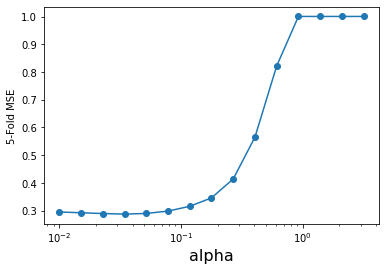

In [25]:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-2,.5,15)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()


In [26]:
#Multiplico el valor de alpha por 0.1
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']*0.1
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

w = lasso.coef_
for f,wi in zip(features,w):
    print(f,wi)

MSE Modelo Lasso (train): 0.242
MSE Modelo Lasso (test) : 0.307
RMSE Modelo Lasso (train): 0.492
RMSE Modelo Lasso (test) : 0.554
dist_centro -0.0016573235389263981
long 0.09585626465556271
metros 0.20478836626499938
planta 0.013290330001372457
tipo_vivienda -0.0019893847881631557
n_banos 0.2475191212929861
n_habitaciones 0.04351995393732943
barrio 0.5289286867103004
ciudad 0.12258658776406996
renta_media_barrio_persona -0.0
ascensor 0.08673843282629068
garaje 0.028363216540872902
trastero 0.02835429880903107


In [27]:
#Multiplico alpha por 1

from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

w = lasso.coef_
for f,wi in zip(features,w):
    print(f,wi)

MSE Modelo Lasso (train): 0.248
MSE Modelo Lasso (test) : 0.325
RMSE Modelo Lasso (train): 0.498
RMSE Modelo Lasso (test) : 0.57
dist_centro -0.0
long 0.0797458538337186
metros 0.18653263742462797
planta 0.0
tipo_vivienda 0.0
n_banos 0.24898086712009926
n_habitaciones 0.02309538675650493
barrio 0.5311585069841785
ciudad 0.08756331037154487
renta_media_barrio_persona 0.0
ascensor 0.059511809543336104
garaje 0.01311702137816152
trastero 0.005642128561364861


In [28]:
from sklearn.metrics import mean_squared_error
#Multiplico alpha por 10
alpha_optimo = grid.best_params_['alpha']*10
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

w = lasso.coef_
for f,wi in zip(features,w):
    print(f,wi)

MSE Modelo Lasso (train): 0.489
MSE Modelo Lasso (test) : 0.652
RMSE Modelo Lasso (train): 0.699
RMSE Modelo Lasso (test) : 0.808
dist_centro 0.0
long 0.0
metros 0.0
planta 0.0
tipo_vivienda 0.0
n_banos 0.11896001311939383
n_habitaciones 0.0
barrio 0.3701959030754307
ciudad 0.0
renta_media_barrio_persona 0.0
ascensor 0.0
garaje 0.0
trastero 0.0


Me quedo con alpha = alpha*10 (ultima opción)

Las variables más influyentes para el precio según Lasso son:
- Barrio
- Numero de baños



In [67]:
alpha_optimo

0.34333200182819934

## ARBOL DE DECISION

Utilizo ahora un ARBOL DE DECISION para mejorar resultados

best mean cross-validation score: 0.742
best parameters: {'max_depth': 9.0}


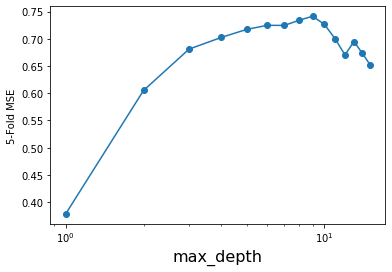

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score


max_depth = np.linspace(1, 15, 15 ) 
#max_depth = np.linspace(1, 30, 10 ) Restultado peor (Best mean cv score:0.68 y maxdepth:10.6)
param_grid = {'max_depth': max_depth }
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = 10)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

grid.cv_results_
scores = np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(max_depth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [30]:
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeRegressor(max_depth=maxDepthOptimo).fit(XtrainScaled,y_train) #PROFUNDIDAD=8

print("Score Train: ",treeModel.score(XtrainScaled,y_train))
print("Score Test: ",treeModel.score(XvalScaled,y_val))

#Veo una diferencia notable entre Score Train y Score Test, por lo que, VOY BAJANDO LA PROFUNDIDAD. 

Score Train:  0.9354317857407071
Score Test:  0.7656265701653401


Con una profundidad menor penalizo mucho el sesgo y no empeoro interpretabilidad

In [31]:
maxDepthOptimo = grid.best_params_['max_depth']

treeModel = DecisionTreeRegressor(max_depth=7).fit(XtrainScaled,y_train) #PROFUNDIDAD=7
print("Score Train: ",treeModel.score(XtrainScaled,y_train))
print("Score Test: ",treeModel.score(XvalScaled,y_val))



Score Train:  0.8876123667812706
Score Test:  0.7688904824836608


In [32]:
y_pred=treeModel.predict(XtestScaled)
y_pred=scalery.inverse_transform(y_pred)
error=np.abs(y_pred-y_test_)
errorPercent=(error/y_test_)*100
errorPercent.mean()

21.564529148854103

## RANDOM FOREST REGRESSOR

Como tercera opcion, utilizo un Random Forest

best mean cross-validation score: 0.849
best parameters: {'max_depth': 12}


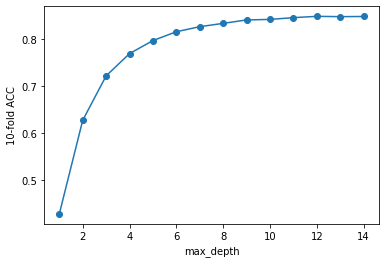

In [33]:
from sklearn.ensemble import RandomForestRegressor

# grid search
maxDepth = range(1,15) #mejores resultados con este rango
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=10) 
grid.fit(XtrainScaled, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

Con la Profundidad=14, el score Train es muy distinto a Score Test. Bajo la profundidad para ver si mejora la interpretabilidad

In [34]:
#Profundidad=14 -- score Train es muy distinto a Score Test -- bajo la profundidad para mejorar la interpretabilidad

maxDepthOptimo = grid.best_params_['max_depth']
rf = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(XtrainScaled,y_train)

print("Score Train: ",rf.score(XtrainScaled,y_train))
print("Score Test: ",rf.score(XvalScaled,y_val))

Score Train:  0.9659041455105012
Score Test:  0.8466319760887916


Sigo bajando tres unidades la profundidad, ahora Profundidad=8, bajando el Socre Train y el Score Test. Me quedo con esta opcion

In [35]:
#Bajo 3 unidades la profundidad del arbol, a 8
maxDepthOptimo = grid.best_params_['max_depth']
rf = RandomForestRegressor(max_depth=13,n_estimators=200,max_features='sqrt').fit(XtrainScaled,y_train)

print("Score Train: ",rf.score(XtrainScaled,y_train))
print("Score Test: ",rf.score(XvalScaled,y_val))

Score Train:  0.9707330148890854
Score Test:  0.8506095288085944


Hago la predicción del precio con un error medio del 17%

In [36]:
y_pred=rf.predict(XtestScaled)
y_pred=scalery.inverse_transform(y_pred)

In [37]:
error=np.abs(y_pred-y_test_)
errorPer=(error/y_test_)*100
errorPer.mean()

17.166450311165992

Obtengo la influencia de las variables en el precio

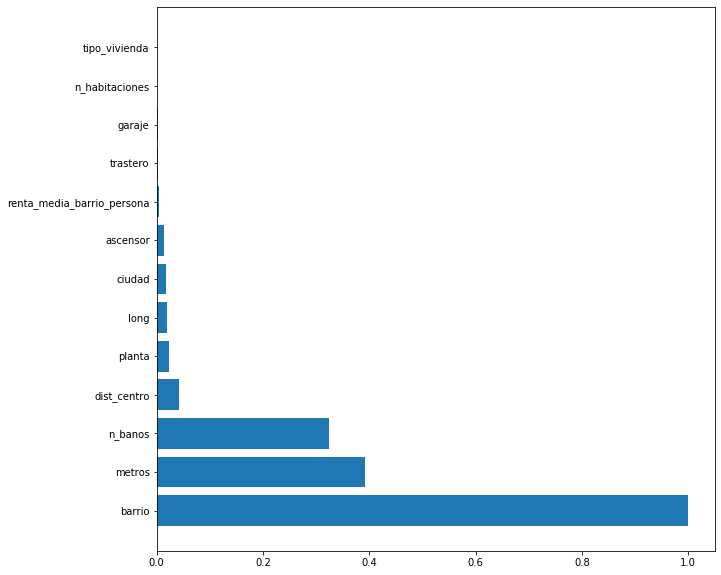

In [38]:
from sklearn import tree

importances = treeModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(XtrainScaled.shape[1]),importances[indices])
plt.yticks(range(XtrainScaled.shape[1]),features[indices])
plt.show()

## BOOSTING 

Por ultimo implemento un Boosting, con el que espero mejores resultados, aunque veo que son más o menos iguales que en el caso anterior en cuanto a % de prediccion del precio de la vivienda

In [39]:
from sklearn.ensemble import GradientBoostingRegressor

Niterations = [100,125,150,175,200,300]
learningRate = [0.5,0.1,0.05,0.01,0.001]
#max_depth=2

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 5)
grid.fit(XtrainScaled, y_train_)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.843
best parameters: {'learning_rate': 0.05, 'n_estimators': 300}


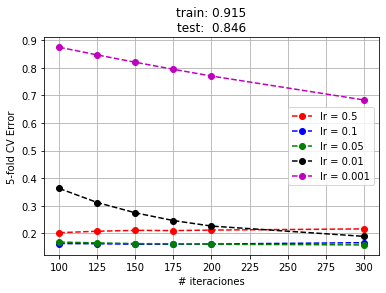

In [40]:
# calculamos métricas globales
lRateOptimo = grid.best_params_['learning_rate']
nEstimatorsOptimo = grid.best_params_['n_estimators']

bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate=lRateOptimo, n_estimators=nEstimatorsOptimo) 
bt.fit(XtrainScaled,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(XtrainScaled,y_train),bt.score(XvalScaled,y_val)))
plt.grid()
plt.show()

Hago la prediccion del precio con un error del 18%

In [41]:
y_pred=bt.predict(XtestScaled)
y_pred=scalery.inverse_transform(y_pred)
error=np.abs(y_pred-y_test_)
errorPerc=(error/y_test_)*100
errorPerc.mean()

18.72942054602237

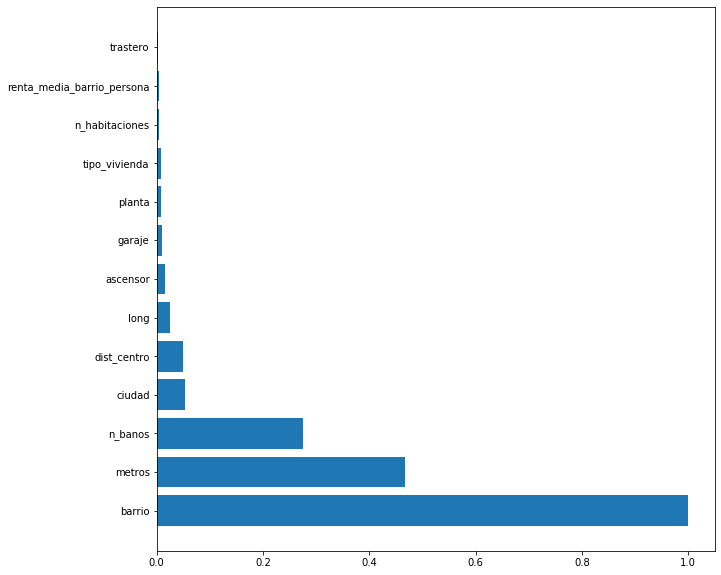

In [42]:
importances = bt.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(XtrainScaled.shape[1]),importances[indices])
plt.yticks(range(XtestScaled.shape[1]),features[indices])
plt.show()

Conclusión: reuniendo la información que nos proporciona Lasso respecto al "sentido" de la influencia (negativo/positivo) y de los mejores resultados que nos dan tanto GradientBoostingRegressor como Random Forest, se puede concluir que las variables más influyentes en el precio son:
- Barrio
- Metros
- NBanos
- Distancia al centro (sentido negativo en Lasso: a menor distancia, mayor precio)
- Ciudad
- Planta

